In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Accident _Dataset.csv', 'Accident_Dataset.ipynb', 'Accident_Dataset_Cleaned.csv', 'Cifar 10.ipynb', 'CIFAR-10_Dataset.ipynb', 'CyberVigilance_Cleaned_Dataset.csv', 'Cybervigilance_Code.ipynb', 'CyberVigilance_Final.csv', 'CyberVigilance_Final.ipynb', 'CyberVigilance_Final.xls', 'CyberVigilance_Finalset.csv', 'CyberVigilance_Final_Dataset.csv', 'desktop.ini', 'Final_Dataset.csv', 'Untitled Folder', 'Untitled.ipynb', 'Untitled1.ipynb']


In [9]:
df = pd.read_csv('Accident _Dataset.csv')

In [10]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12317 entries, 0 to 12316
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12317 non-null  object 
 2   Age_band_of_driver           12317 non-null  object 
 3   Sex_of_driver                12316 non-null  object 
 4   Educational_level            11575 non-null  object 
 5   Vehicle_driver_relation      11737 non-null  object 
 6   Driving_experience           11487 non-null  object 
 7   Type_of_vehicle              11366 non-null  object 
 8   Owner_of_vehicle             11834 non-null  object 
 9   Service_year_of_vehicle      8388 non-null   object 
 10  Defect_of_vehicle            7889 non-null   object 
 11  Area_accident_occured        12077 non-null  object 
 12  Lanes_or_Medians             11931 non-null  object 
 13  Road_allignment 

Check for missing data

In [12]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing data

Time                              1
Sex_of_driver                     1
Educational_level               742
Vehicle_driver_relation         580
Driving_experience              830
Type_of_vehicle                 951
Owner_of_vehicle                483
Service_year_of_vehicle        3929
Defect_of_vehicle              4428
Area_accident_occured           240
Lanes_or_Medians                386
Road_allignment                 143
Types_of_Junction               888
Road_surface_type               173
Road_surface_conditions           1
Light_conditions                  1
Weather_conditions                1
Type_of_collision               156
Number_of_vehicles_involved       1
Number_of_casualties              1
Vehicle_movement                309
Casualty_class                    1
Sex_of_casualty                   1
Age_band_of_casualty              1
Casualty_severity                 1
Work_of_casuality              3199
Fitness_of_casuality           2636
Pedestrian_movement         

In [5]:
!pip install scikit-learn

In [ ]:
Handling Missing Data

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Make a copy of the dataframe to avoid modifying the original data
df_imputed = df.copy()

# Identify columns that are categorical and numerical
categorical_cols = df_imputed.select_dtypes(include=['object']).columns
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns

# Encode all categorical features with LabelEncoder
for col in categorical_cols:
    df_imputed[col] = LabelEncoder().fit_transform(df_imputed[col].astype(str))

# Impute missing values in feature columns
# - Use mean for numerical columns
# - Use most frequent value for categorical columns
for col in df_imputed.columns:
    if col in numerical_cols:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())
    else:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

# Now, predictive imputation for high-missingness categorical columns
for col in high_missing_cols:
    if col in categorical_cols:  # Only apply to categorical columns with high missingness
        # Split data with and without missing values
        train_data = df_imputed[df_imputed[col].notnull()]
        test_data = df_imputed[df_imputed[col].isnull()]

        # Skip if no missing values remain
        if test_data.empty:
            continue

        # Define features and target
        X_train = train_data.drop(columns=[col])
        y_train = train_data[col]

        # Fit the KNeighborsClassifier and predict
        knn_classifier = KNeighborsClassifier(n_neighbors=5)
        knn_classifier.fit(X_train, y_train)
        df_imputed.loc[df_imputed[col].isnull(), col] = knn_classifier.predict(test_data.drop(columns=[col]))

# Check if any missing values remain
print(df_imputed.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [16]:
high_missing_cols = ['Defect_of_vehicle', 'Service_year_of_vehicle']  # Replace with actual column names

In [ ]:
C

In [ ]:
import os
print(os.listdir())

In [18]:
import pandas as pd

# Load and display the cleaned dataset
cleaned_file_path = 'Accident_Dataset_Cleaned.csv'
df_cleaned = pd.read_csv(cleaned_file_path)

# Show the first few rows of the cleaned dataset
df_cleaned.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   735            2                   1              1                  0   
1   735            2                   2              1                  4   
2   735            2                   1              1                  4   
3    42            4                   1              1                  4   
4    42            4                   1              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1               17   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...                 2   
1                 3                        2  ...                 2   
2                 3                        6  ...                 2   
3                 0                        6  ...                 2   
4                 3                        2  ...                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   
2               0                1                     1                  2   
3               2                0                     0                  2   
4               3                2                     5                  3   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  7                     5                    5   
1                  7                     5                    5   
2                  0                     5                    5   
3                  0                     2                    5   
4                  7                     5                    5   

   Cause_of_accident  Accident_severity  
0                  9                  2  
1                 16                  2  
2                  0                  1  
3                  1                  2  
4                 16                  2  

[5 rows x 32 columns]

In [ ]:
Check outliers

In [19]:
# Show statistical summary of numeric columns to spot any outliers
df_cleaned.describe()

Time   Day_of_week  Age_band_of_driver  Sex_of_driver  \
count  12317.000000  12317.000000        12317.000000   12317.000000   
mean     593.996915      3.980190            2.292766       0.957701   
std      265.338303      2.059941            1.337625       0.264397   
min        0.000000      0.000000            0.000000       0.000000   
25%      380.000000      2.000000            1.000000       1.000000   
50%      632.000000      4.000000            2.000000       1.000000   
75%      801.000000      6.000000            3.000000       1.000000   
max     1074.000000      7.000000            5.000000       3.000000   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
count       12317.000000             12317.000000        12317.000000   
mean            3.389137                 0.522124            2.215962   
std             1.627694                 1.068581            1.608366   
min             0.000000                 0.000000            0.000000   
25%             2.000000                 0.000000            1.000000   
50%             4.000000                 0.000000            2.000000   
75%             4.000000                 0.000000            3.000000   
max             7.000000                 4.000000            7.000000   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  ...  \
count     12317.000000      12317.000000             12317.000000  ...   
mean          6.412519          2.733214                 3.851668  ...   
std           5.281619          0.912070                 2.096487  ...   
min           0.000000          0.000000                 0.000000  ...   
25%           0.000000          3.000000                 2.000000  ...   
50%           5.000000          3.000000                 5.000000  ...   
75%           9.000000          3.000000                 6.000000  ...   
max          17.000000          4.000000                 6.000000  ...   

       Vehicle_movement  Casualty_class  Sex_of_casualty  \
count      12317.000000    12317.000000     12317.000000   
mean           3.140456        1.454169         1.148169   
std            2.591254        1.331452         0.742866   
min            0.000000        0.000000         0.000000   
25%            2.000000        0.000000         1.000000   
50%            2.000000        1.000000         1.000000   
75%            3.000000        3.000000         2.000000   
max           13.000000        4.000000         3.000000   

       Age_band_of_casualty  Casualty_severity  Work_of_casuality  \
count          12317.000000       12317.000000       12317.000000   
mean               2.621255           2.294065           2.492084   
std                2.121247           0.587911           2.908903   
min                0.000000           0.000000           0.000000   
25%                0.000000           2.000000           0.000000   
50%                3.000000           2.000000           1.000000   
75%                5.000000           3.000000           7.000000   
max                6.000000           4.000000           7.000000   

       Fitness_of_casuality  Pedestrian_movement  Cause_of_accident  \
count          12317.000000         12317.000000       12317.000000   
mean               2.642121             4.836405           6.917106   
std                1.236373             0.894362           5.102906   
min                0.000000             0.000000           0.000000   
25%                2.000000             5.000000           1.000000   
50%                2.000000             5.000000           9.000000   
75%                2.000000             5.000000          11.000000   
max                5.000000             9.000000          20.000000   

       Accident_severity  
count       12317.000000  
mean            1.832914  
std             0.406202  
min             0.000000  
25%             2.000000  
50%             2.000000  
75%             2.000000  
max             3.0000

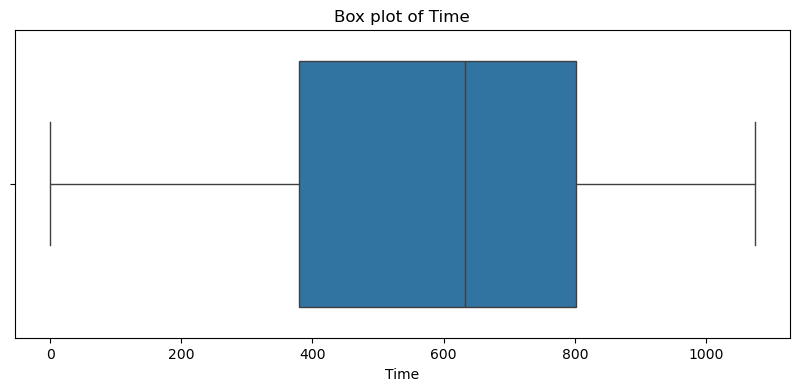

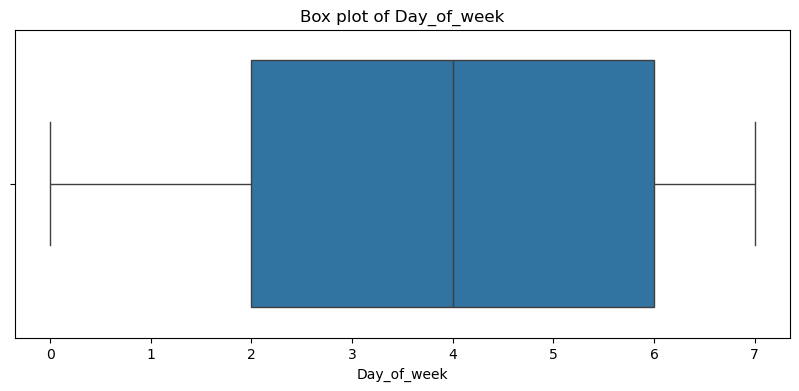

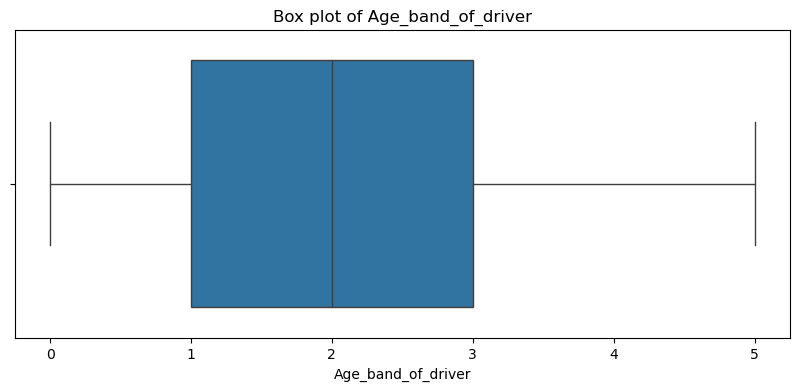

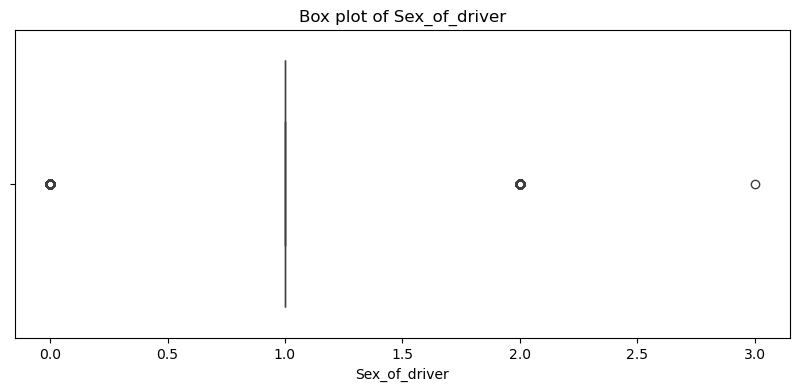

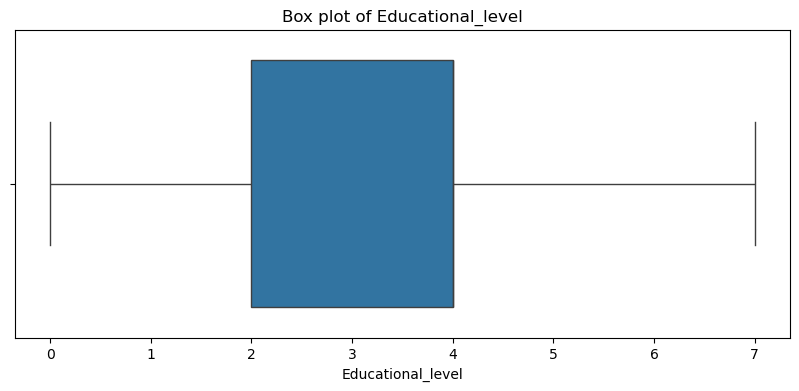

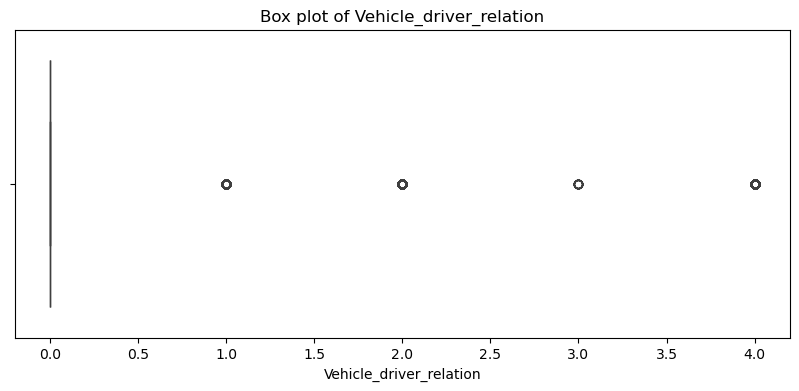

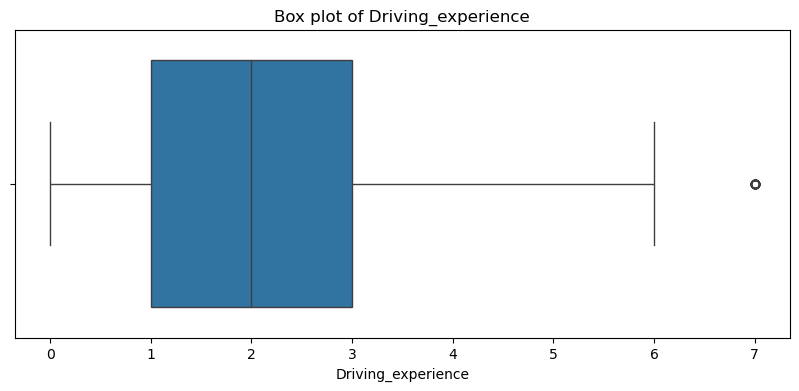

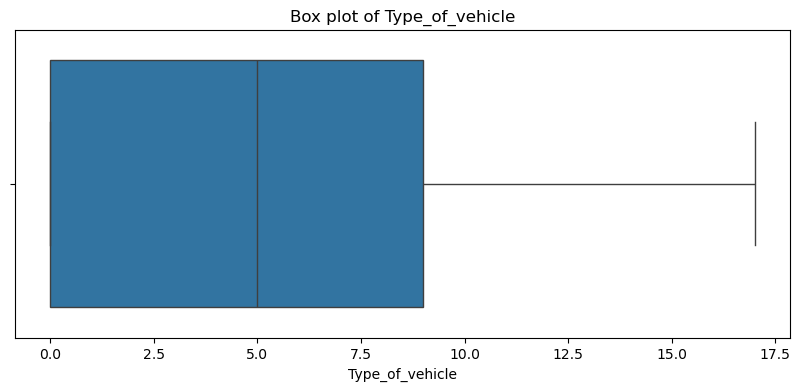

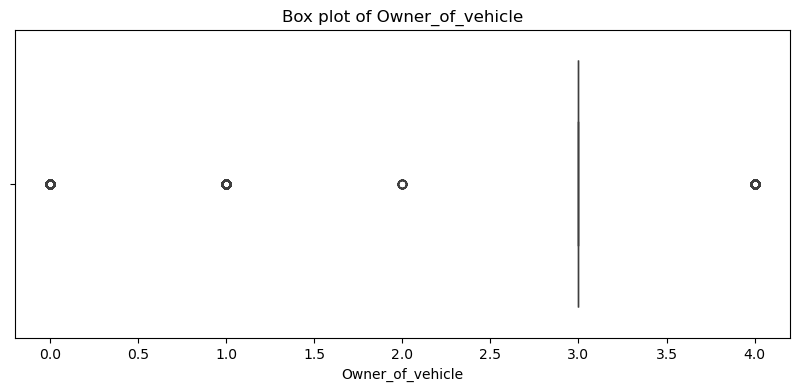

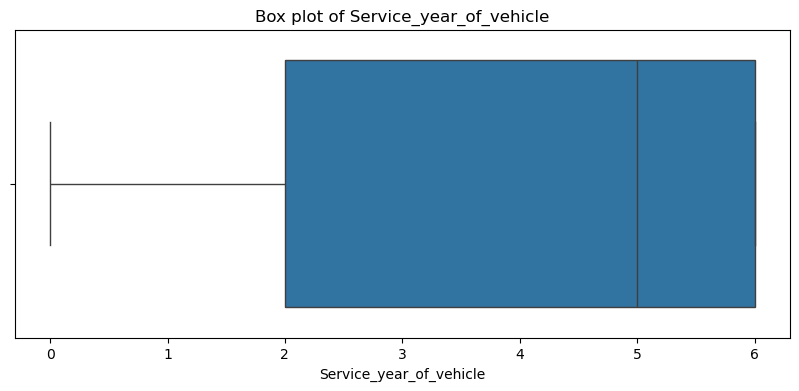

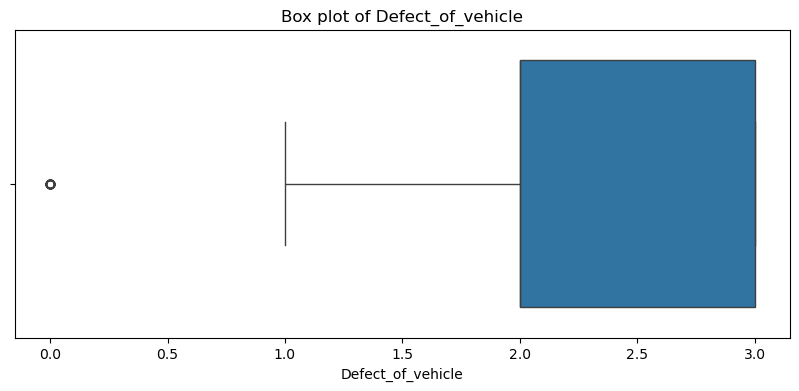

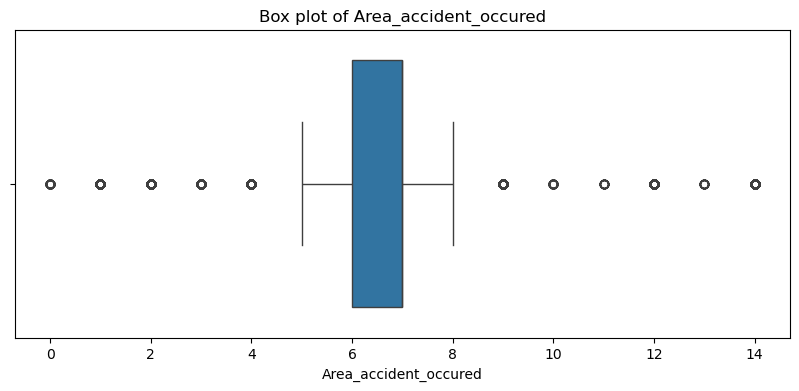

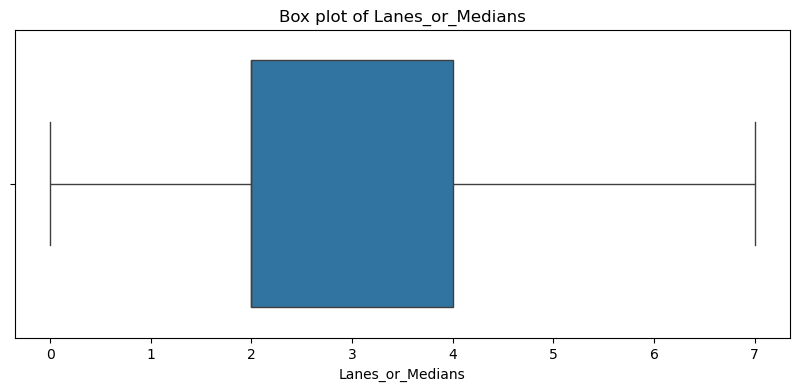

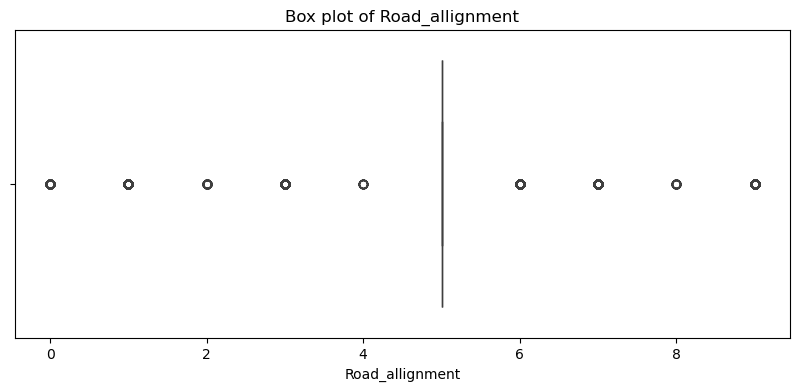

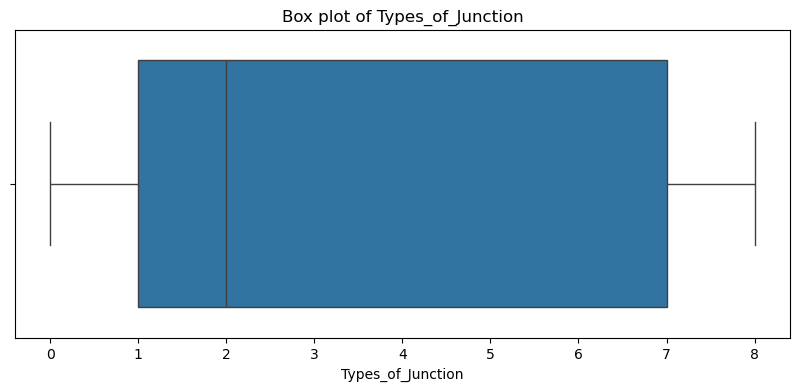

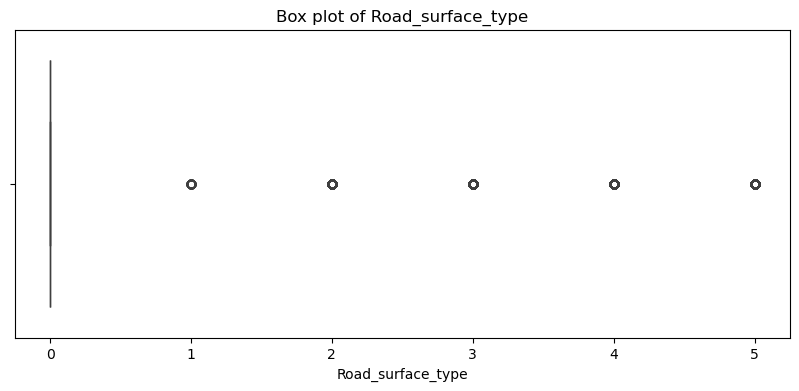

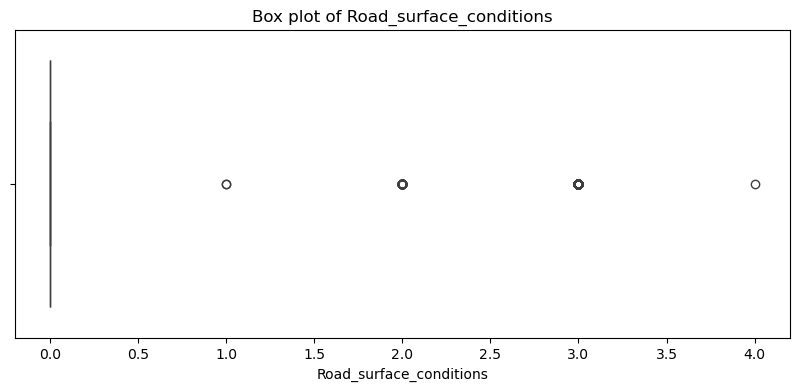

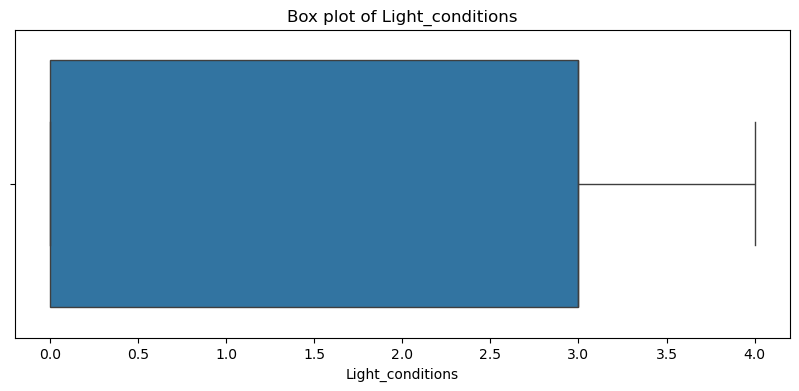

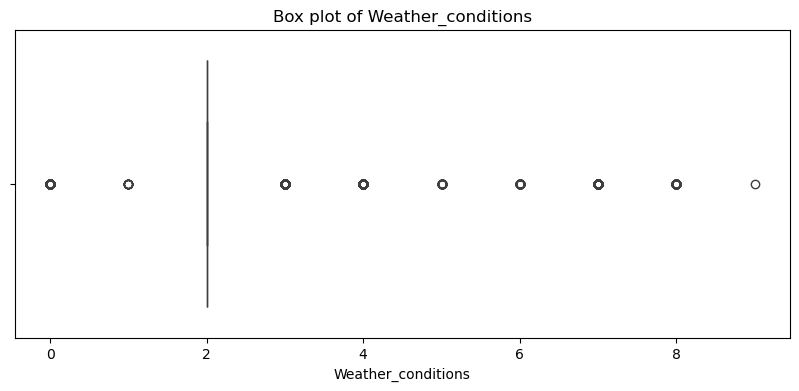

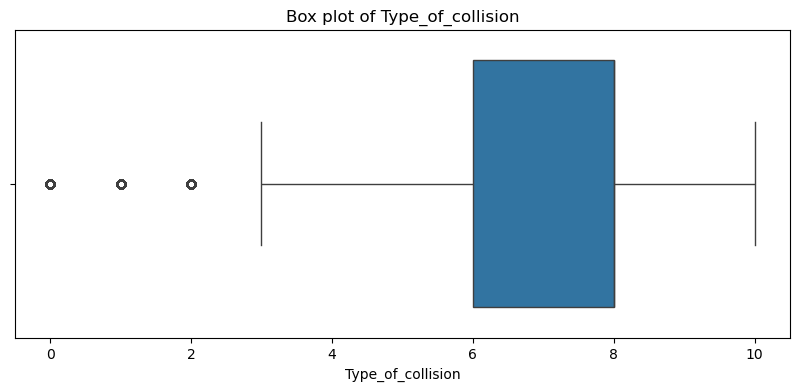

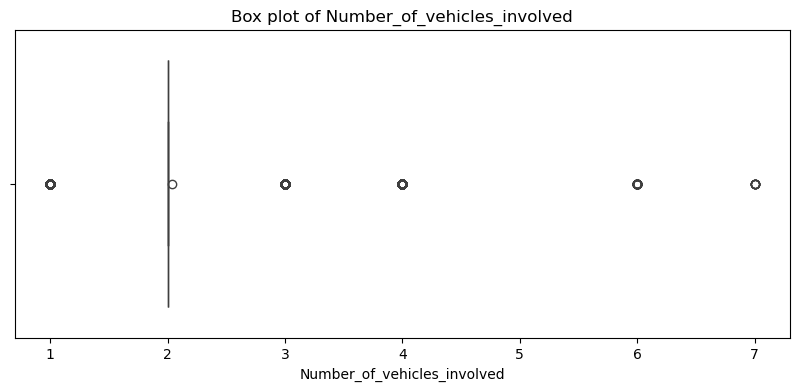

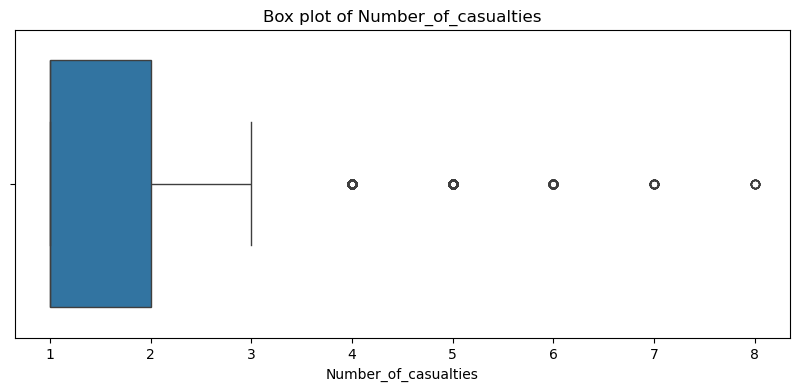

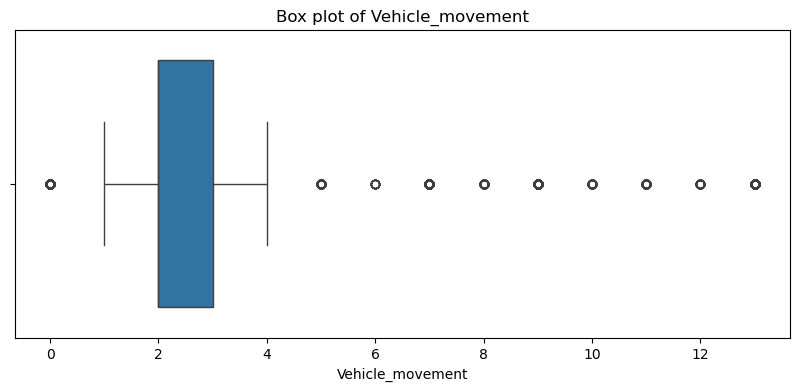

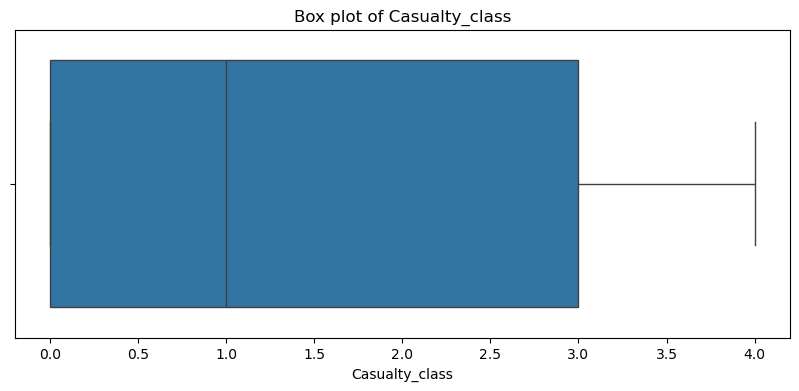

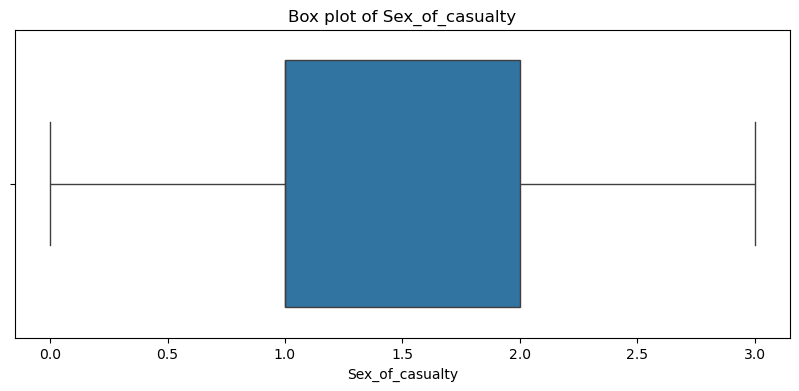

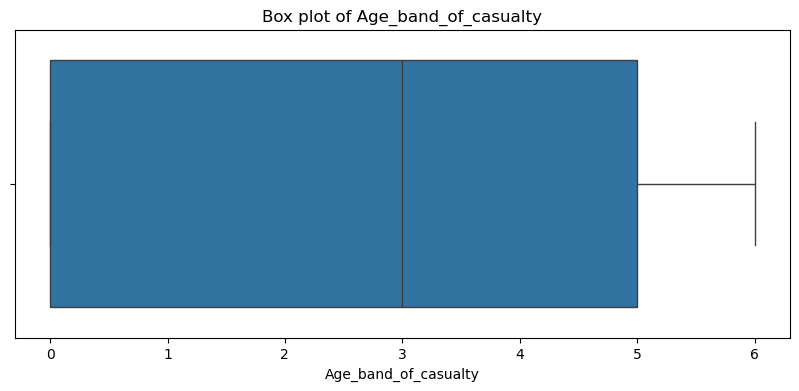

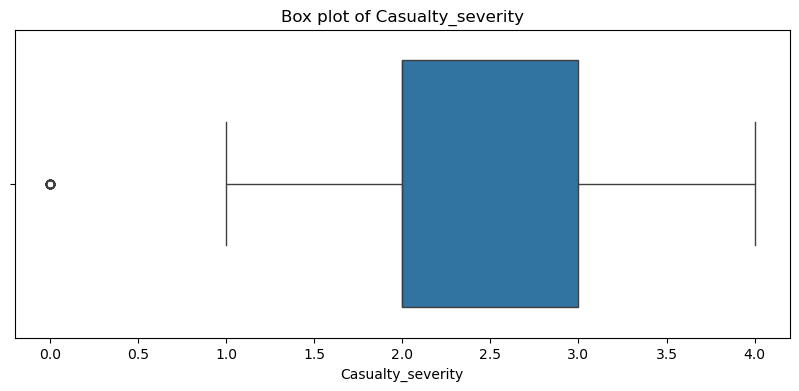

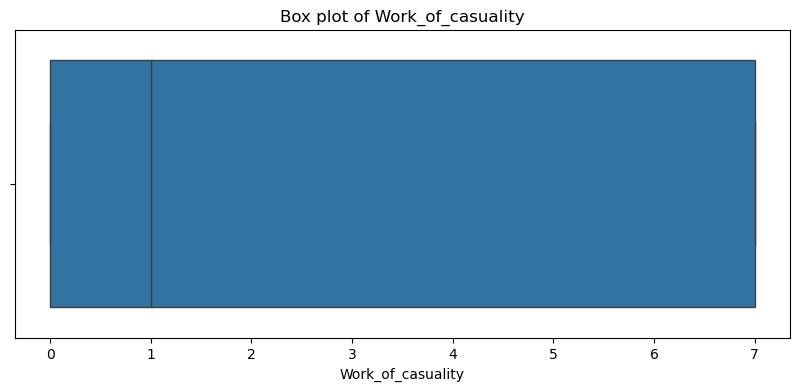

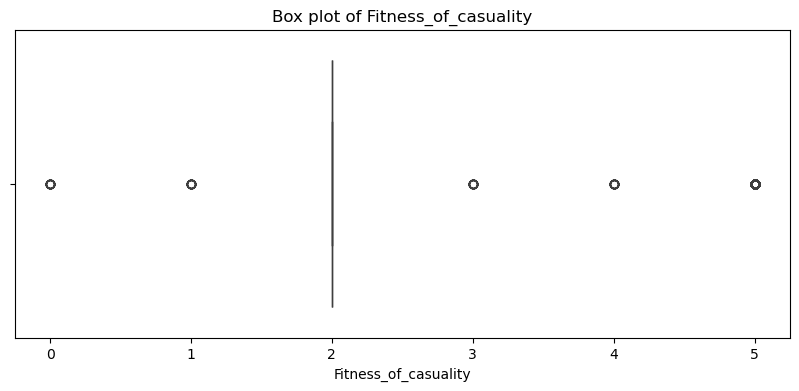

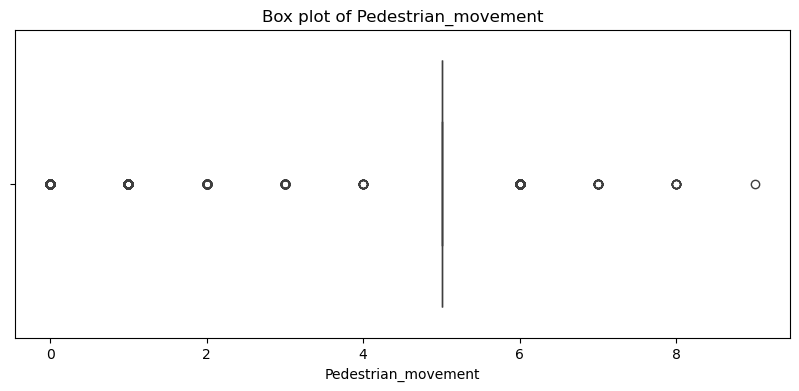

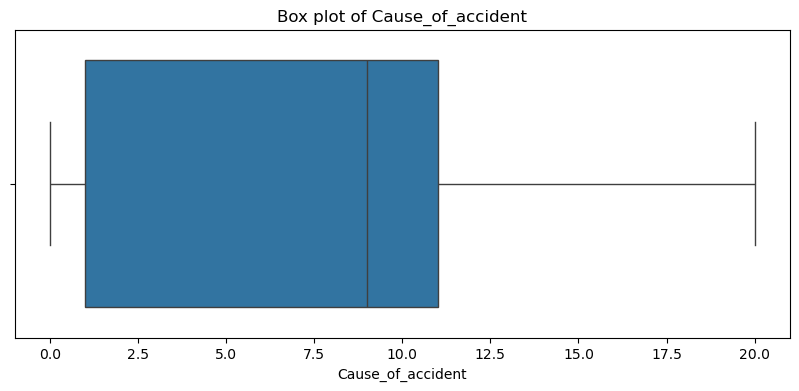

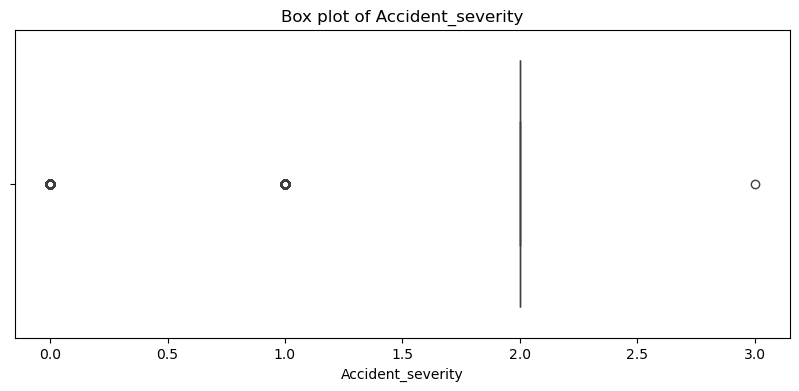

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [ ]:
Handling outliers

In [21]:
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    upper_limit = df_cleaned[col].quantile(0.95)
    lower_limit = df_cleaned[col].quantile(0.05)
    df_cleaned[col] = np.where(df_cleaned[col] > upper_limit, upper_limit, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] < lower_limit, lower_limit, df_cleaned[col])

In [ ]:
Skewness Metrics

In [22]:
skewed_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).skew()
print(skewed_columns[abs(skewed_columns) > 1])

Sex_of_driver             -3.825510
Vehicle_driver_relation    1.399067
Owner_of_vehicle          -2.590814
Road_allignment           -1.913255
Road_surface_type          3.105964
Road_surface_conditions    1.216983
Light_conditions          -1.017871
Weather_conditions         1.853348
Type_of_collision         -1.207134
Number_of_casualties       1.669497
Vehicle_movement           1.991307
Fitness_of_casuality       1.384052
Accident_severity         -1.913798
dtype: float64


In [ ]:
Log Transformation

In [23]:
print(df_cleaned.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [24]:
from scipy.stats import boxcox

df_cleaned['Day_of_week'], _ = boxcox(df_cleaned['Day_of_week'] + 1)  # Adding 1 to avoid zero values

In [25]:
from scipy.stats import boxcox

df_cleaned['Area_accident_occured'], _ = boxcox(df_cleaned['Area_accident_occured'] + 1)  # Adding 1 to avoid zero values

In [26]:
from scipy.stats import boxcox

df_cleaned['Weather_conditions'], _ = boxcox(df_cleaned['Weather_conditions'] + 1)  # Adding 1 to avoid zero values

In [27]:
df_cleaned['Day_of_week'] = np.log1p(df_cleaned['Day_of_week'])  # Replace with actual column name

Replacing Zero Values

In [28]:
columns_to_replace_zeros = ['Age_band_of_driver', 'Age_band_of_casualty']  # Replace with relevant columns
for col in columns_to_replace_zeros:
    df_cleaned[col] = df_cleaned[col].replace(0, df_cleaned[col].mean())

Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separate categorical features based on whether they are ordinal or nominal
ordinal_features = ['Age_band_of_driver', 'Age_band_of_casualty']  # Replace with actual ordinal column names
nominal_features = [col for col in df_cleaned.select_dtypes(include=['object']).columns if col not in ordinal_features]

# Label Encoding for Ordinal Features
for col in ordinal_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# One-Hot Encoding for Nominal Features
df_cleaned = pd.get_dummies(df_cleaned, columns=nominal_features)

Scale numerical features

In [30]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

In [31]:
# Attempt to load the file as a CSV to see if it's a plain text file with CSV structure
data = pd.read_csv('Accident_Dataset_Cleaned.csv')

# Display the first few rows to inspect the dataset
data.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   735            2                   1              1                  0   
1   735            2                   2              1                  4   
2   735            2                   1              1                  4   
3    42            4                   1              1                  4   
4    42            4                   1              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1               17   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...                 2   
1                 3                        2  ...                 2   
2                 3                        6  ...                 2   
3                 0                        6  ...                 2   
4                 3                        2  ...                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   
2               0                1                     1                  2   
3               2                0                     0                  2   
4               3                2                     5                  3   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  7                     5                    5   
1                  7                     5                    5   
2                  0                     5                    5   
3                  0                     2                    5   
4                  7                     5                    5   

   Cause_of_accident  Accident_severity  
0                  9                  2  
1                 16                  2  
2                  0                  1  
3                  1                  2  
4                 16                  2  

[5 rows x 32 columns]

Machine Learning Models

Decision Tree

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target selection
X = data.drop(columns=["Accident_severity"])  # Drop the target column from features
y = data["Accident_severity"]  # Define the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Display a detailed classification report
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7627164502164502
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



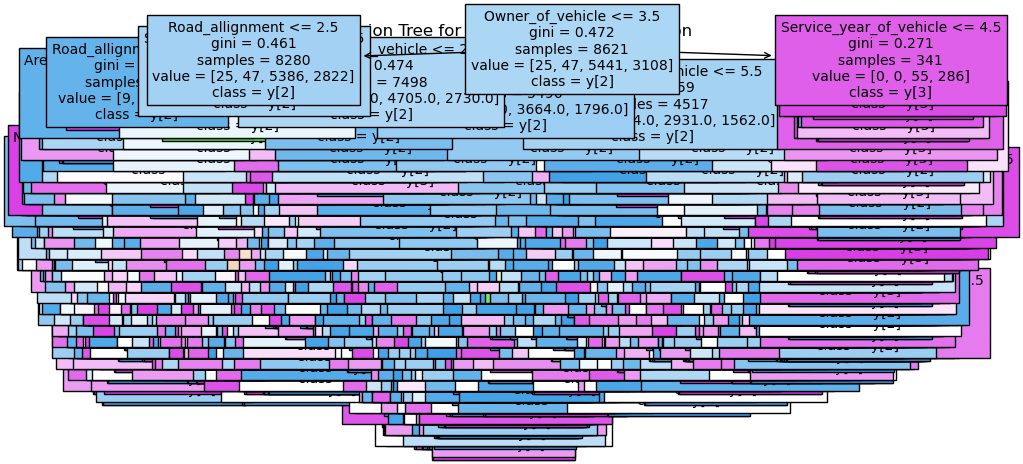

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have a dataset loaded with features X and target y
# Example:
# X = data.drop(columns=['target_column'])
# y = data['target_column']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(10, 5))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=True, fontsize=10)
plt.title("Decision Tree for Traffic Violations Prediction")
plt.show()

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified parameters
logistic_regression = LogisticRegression(max_iter=2000, solver='saga', tol=1e-4, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, random_state=42, solver='saga')

In [38]:
logistic_regression = LogisticRegression(max_iter=3000, solver='saga', tol=1e-4, random_state=42)
logistic_regression.fit(X_train, y_train)

C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=3000, random_state=42, solver='saga')

In [39]:
logistic_regression = LogisticRegression(max_iter=3000, solver='saga', tol=1e-5, random_state=42)
logistic_regression.fit(X_train, y_train)

C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=3000, random_state=42, solver='saga', tol=1e-05)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression.fit(X_train_scaled, y_train)

C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=3000, random_state=42, solver='saga', tol=1e-05)

In [41]:
logistic_regression = LogisticRegression(max_iter=3000, solver='lbfgs', tol=1e-4, random_state=42)
logistic_regression.fit(X_train, y_train)

C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=42)

In [37]:
# Initialize the Logistic Regression model with higher max_iter, adjusted tolerance, and the saga solver
logistic_regression = LogisticRegression(max_iter=2000, solver='saga', tol=1e-4, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Display a detailed classification report
print(classification_report(y_test, y_pred, zero_division=1))

Logistic Regression Accuracy: 0.8395562770562771
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       1.00      0.00      0.00       547
           2       0.84      1.00      0.91      3103

    accuracy                           0.84      3696
   macro avg       0.95      0.33      0.30      3696
weighted avg       0.87      0.84      0.77      3696



C:\Users\f3465799\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training and Model Validation

In [43]:
from sklearn.model_selection import train_test_split

# Assuming 'Accident_severity' is the target variable
X = data.drop(columns=["Accident_severity"])  # Features
y = data["Accident_severity"]  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shapes of the resulting splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8621, 31), (8621,)
Testing set shape: (3696, 31), (3696,)


In [ ]:
Evaluating Model Performance

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Assuming `model` is a trained model and `X_test`, `y_test` are the test data
def evaluate_model_performance(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    
    # Print individual metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Example usage with a trained model
# evaluate_model_performance(model, X_test, y_test)

In [6]:
import pandas as pd

# Load and display the cleaned dataset
cleaned_file_path = 'Accident_Dataset_Cleaned.csv'
df_cleaned = pd.read_csv(cleaned_file_path)

# Show the first few rows of the cleaned dataset
df_cleaned.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   735            2                   1              1                  0   
1   735            2                   2              1                  4   
2   735            2                   1              1                  4   
3    42            4                   1              1                  4   
4    42            4                   1              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1               17   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...                 2   
1                 3                        2  ...                 2   
2                 3                        6  ...                 2   
3                 0                        6  ...                 2   
4                 3                        2  ...                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   
2               0                1                     1                  2   
3               2                0                     0                  2   
4               3                2                     5                  3   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  7                     5                    5   
1                  7                     5                    5   
2                  0                     5                    5   
3                  0                     2                    5   
4                  7                     5                    5   

   Cause_of_accident  Accident_severity  
0                  9                  2  
1                 16                  2  
2                  0                  1  
3                  1                  2  
4                 16                  2  

[5 rows x 32 columns]

Evaluating model performance using the accuracy metric:

In [1]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming `y_test` is the true labels and `y_pred` are the model's predictions
def evaluate_model_accuracy(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print a detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Example usage
# Assuming `model` is a trained model and `X_test`, `y_test` are your test data
# y_pred = model.predict(X_test)
# evaluate_model_accuracy(y_test, y_pred)

In [ ]:
Accuracy metric

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
data = pd.read_csv('Accident_Dataset_Cleaned.csv')

# Define features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = data.drop(columns=['Accident_severity'])  # Features
y = data['Accident_severity']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (e.g., Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7627

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



Precision Metric

In [6]:
from sklearn.metrics import precision_score, classification_report

# Assuming `y_test` is the true labels and `y_pred` are the model's predictions
def evaluate_model_precision(y_test, y_pred):
    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Print precision
    print(f"Precision: {precision:.4f}")
    
    # Print a detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Example usage
# Assuming `model` is a trained model and `X_test`, `y_test` are your test data
# y_pred = model.predict(X_test)
# evaluate_model_precision(y_test, y_pred)

In [7]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)

In [8]:
y_pred = model.predict(X_test)
evaluate_model_precision(y_test, y_pred)

Precision: 0.7663

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



Recall Metric

In [9]:
from sklearn.metrics import recall_score, classification_report

# Assuming `y_test` is the true labels and `y_pred` are the model's predictions
def evaluate_model_recall(y_test, y_pred):
    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Print recall
    print(f"Recall: {recall:.4f}")
    
    # Print a detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Example usage
# Assuming `model` is a trained model and `X_test`, `y_test` are your test data
# y_pred = model.predict(X_test)
# evaluate_model_recall(y_test, y_pred)

In [10]:
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

In [11]:
y_pred = model.predict(X_test)
evaluate_model_recall(y_test, y_pred)

Recall: 0.7627

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



Computational Time 

In [14]:
import time
from sklearn.metrics import accuracy_score

# Assuming `model` is a trained model and `X_test` and `y_test` are the test data
def evaluate_model_computational_time(model, X_test, y_test):
    # Record the start time
    start_time = time.time()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Record the end time
    end_time = time.time()
    
    # Calculate computational time
    computational_time = end_time - start_time
    
    # Print the computational time
    print(f"Computational Time for Prediction: {computational_time:.4f} seconds")
    
    # Calculate accuracy for context
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

# Example usage with a trained model
# evaluate_model_computational_time(model, X_test, y_test)

In [15]:
evaluate_model_computational_time(model, X_test, y_test)

Computational Time for Prediction: 0.0229 seconds
Accuracy: 0.7627


KAPPA Metric

In [20]:
from sklearn.metrics import cohen_kappa_score, classification_report

# Assuming `y_test` is the true labels and `y_pred` are the model's predictions
def evaluate_model_kappa(y_test, y_pred):
    # Calculate Cohen's Kappa score
    kappa = cohen_kappa_score(y_test, y_pred)
    
    # Print Cohen's Kappa score
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    
    # Print a detailed classification report for additional context
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Example usage
# Assuming `model` is a trained model and `X_test`, `y_test` are your test data
# y_pred = model.predict(X_test)
# evaluate_model_kappa(y_test, y_pred)

In [21]:
kappa = cohen_kappa_score(y_test, y_pred)

In [22]:
y_pred = model.predict(X_test)
evaluate_model_kappa(y_test, y_pred)

Cohen's Kappa Score: 0.1440

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



F!-score

In [23]:
from sklearn.metrics import f1_score, classification_report

# Assuming `y_test` is the true labels and `y_pred` are the model's predictions
def evaluate_model_f1_score(y_test, y_pred):
    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print F1-score
    print(f"F1-Score: {f1:.4f}")
    
    # Print a detailed classification report for additional context
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Example usage
# Assuming `model` is a trained model and `X_test`, `y_test` are your test data
# y_pred = model.predict(X_test)
# evaluate_model_f1_score(y_test, y_pred)

In [24]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [25]:
y_pred = model.predict(X_test)
evaluate_model_f1_score(y_test, y_pred)

F1-Score: 0.7645

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        46
           1       0.26      0.27      0.26       547
           2       0.86      0.86      0.86      3103

    accuracy                           0.76      3696
   macro avg       0.45      0.46      0.45      3696
weighted avg       0.77      0.76      0.76      3696



XAI techniques

Train Model using LIME

In [26]:
pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 145.2 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/275.7 kB 163.4 kB/s eta 0:00:02
     -------------- --------------------- 112.6/275.7 kB 385.0 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 862.0 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 737.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=e41c4a5f560876c3db61ea54c4d8e87f004b890f7b1a1

In [1]:
import lime
import lime.lime_tabular
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv") 

# Separate features and target variable
X = df.drop('Vehicle_movement', axis=1) 
y = df['Vehicle_movement']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=3000, solver='saga', tol=1e-4, random_state=42)
model.fit(X_train_scaled, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['No Accident', 'Accident'],  
    discretize_continuous=True
)

# Choose a test instance for explanation
i = 0  # Index of the test instance to explain
instance = X_test_scaled[i].reshape(1, -1)  

# Generate explanation for the selected instance
exp = explainer.explain_instance(
    instance[0],
    model.predict_proba,
    num_features=10 
)

# Display explanation
exp.show_in_notebook(show_table=True)

SHAP Training Model

In [2]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
    --------------------------------------- 10.2/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 640.0 kB/s eta 0:00:01
   -------- ------------------------------- 92.2/456.2 kB 1.0 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/456.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.4 MB/s eta 0:00:00


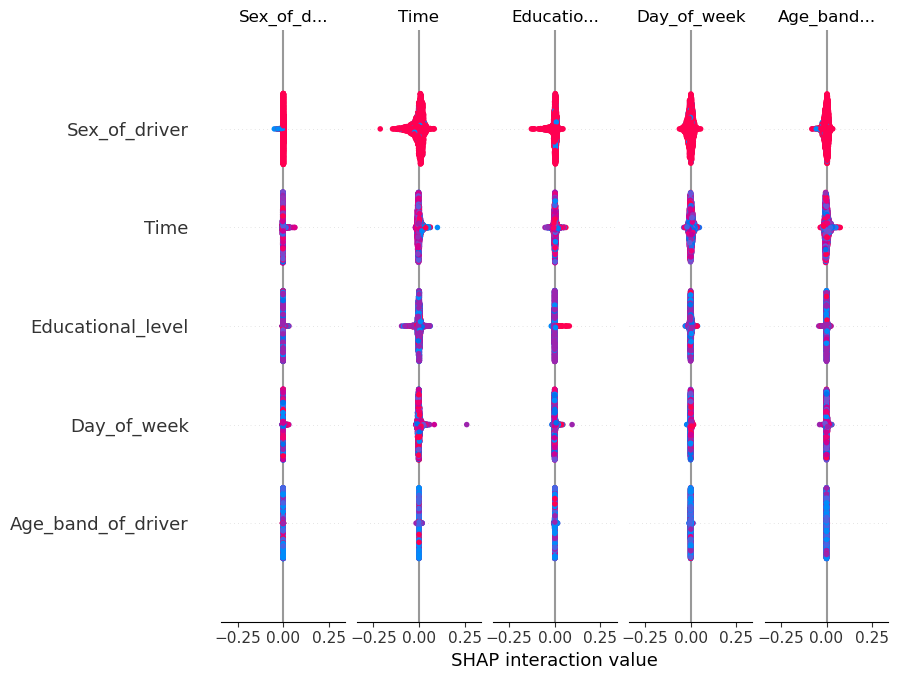

In [6]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv")  

# Separate features and target variable
X = df.drop('Owner_of_vehicle', axis=1)  
y = df['Owner_of_vehicle']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, depending on your model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model (or any model you prefer)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Initialize SHAP explainer (use TreeExplainer for tree-based models like RandomForest)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

PDP Training Model

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


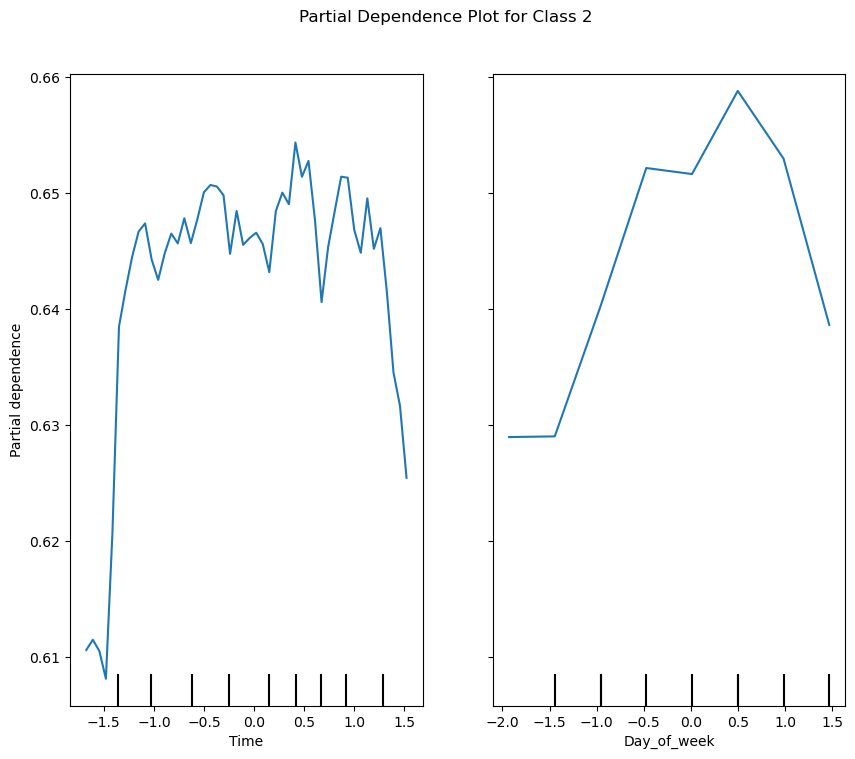

In [5]:
from sklearn.inspection import PartialDependenceDisplay

# Generate and plot partial dependence plots for a specified target class (e.g., class 2)
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(
    model, X_train_scaled, features_to_plot, 
    feature_names=X.columns, grid_resolution=50, ax=ax, target=2  
)
plt.suptitle('Partial Dependence Plot for Class 2')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

Sample Instances

In [15]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv")  # Replace with the correct path if needed

# Separate features and target variable
X = df.drop('Defect_of_vehicle', axis=1)  # Replace 'target_column' with the actual target column name
y = df['Defect_of_vehicle']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Select specific instances to explain
sample_indices = [0, 5, 10]
samples = pd.DataFrame(X_test_scaled[sample_indices], columns=X.columns)

# Calculate SHAP values for the selected samples
shap_values = explainer.shap_values(samples)

# Debug: Print the shapes of each component
print("Shape of samples.iloc[0].values:", samples.iloc[0].values.shape)
print("Shape of shap_values[0][0]:", shap_values[0][0].shape)
print("Shape of feature_names:", X.columns.shape)

# Use the correct SHAP values depending on the classification type
shap_values_to_use = shap_values[0] if len(shap_values) == 1 else shap_values[1]

# Generate detailed explanations for each sample with force plot
for i, index in enumerate(sample_indices):
    print(f"\nExplanation for instance {index} (sample index {i}):")
    # Further debug the exact inputs
    print(f"SHAP values shape for instance {i}: {shap_values_to_use[i].shape}")
    print(f"Features shape for instance {i}: {samples.iloc[i].values.shape}")
    
    # Run force plot
    shap.force_plot(
        explainer.expected_value[0], 
        shap_values_to_use[i], 
        samples.iloc[i].values, 
        feature_names=X.columns
    )


Shape of samples.iloc[0].values: (31,)
Shape of shap_values[0][0]: (4,)
Shape of feature_names: (31,)

Explanation for instance 0 (sample index 0):
SHAP values shape for instance 0: (4,)
Features shape for instance 0: (31,)


DimensionError: Length of features is not equal to the length of shap_values!

In [16]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv")  # Replace with your actual path

X = df.drop('Defect_of_vehicle', axis=1)  # Replace with your actual target column name
y = df['Defect_of_vehicle']

# Split and scale dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP Explainer
explainer = shap.TreeExplainer(model)

# Select specific instances and convert to DataFrame
sample_indices = [0, 5, 10]
samples = pd.DataFrame(X_test_scaled[sample_indices], columns=X.columns)

# Get SHAP values
shap_values = explainer.shap_values(samples)

# Verify shapes
print("Samples shape:", samples.shape)
print("SHAP values shape:", shap_values[0].shape if len(shap_values) == 1 else shap_values[1].shape)
print("Expected value shape:", len(explainer.expected_value) if isinstance(explainer.expected_value, list) else 1)

# Select the correct SHAP value array
shap_values_to_use = shap_values[0] if len(shap_values) == 1 else shap_values[1]

# Plot each sample with matplotlib rendering for Jupyter compatibility
for i, index in enumerate(sample_indices):
    print(f"\nInstance {index} (sample index {i}):")
    shap.force_plot(
        explainer.expected_value[0], 
        shap_values_to_use[i], 
        samples.iloc[i].values, 
        feature_names=X.columns
    ).matplotlib()

Samples shape: (3, 31)
SHAP values shape: (31, 4)
Expected value shape: 1

Instance 0 (sample index 0):


DimensionError: Length of features is not equal to the length of shap_values!

Visualisation

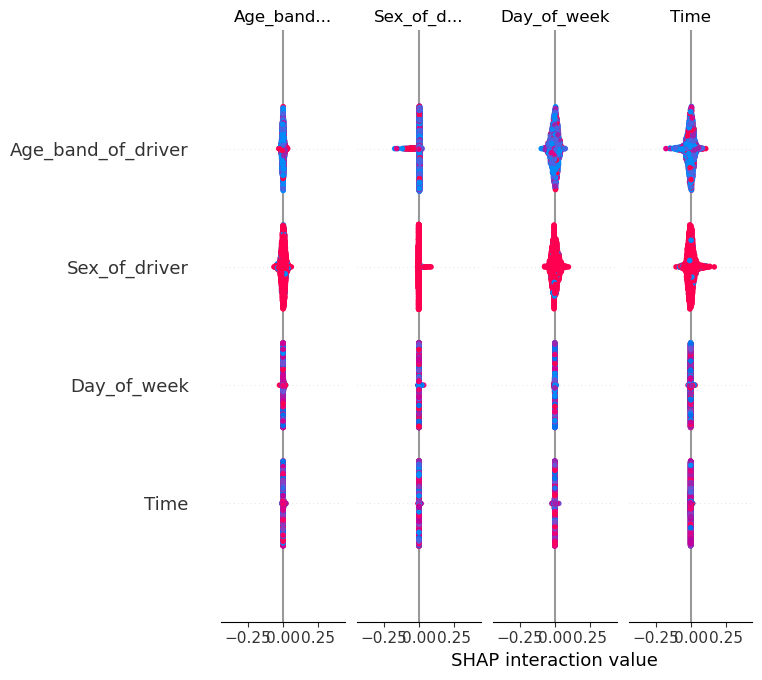

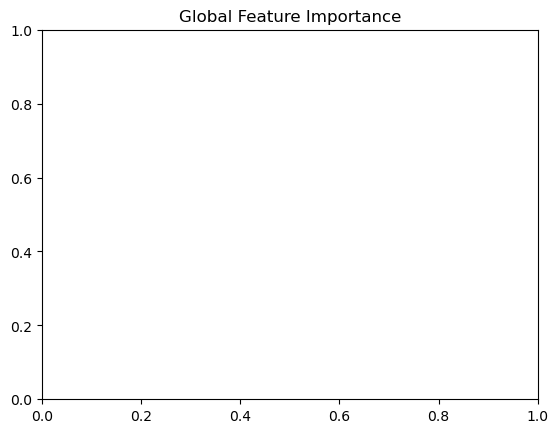

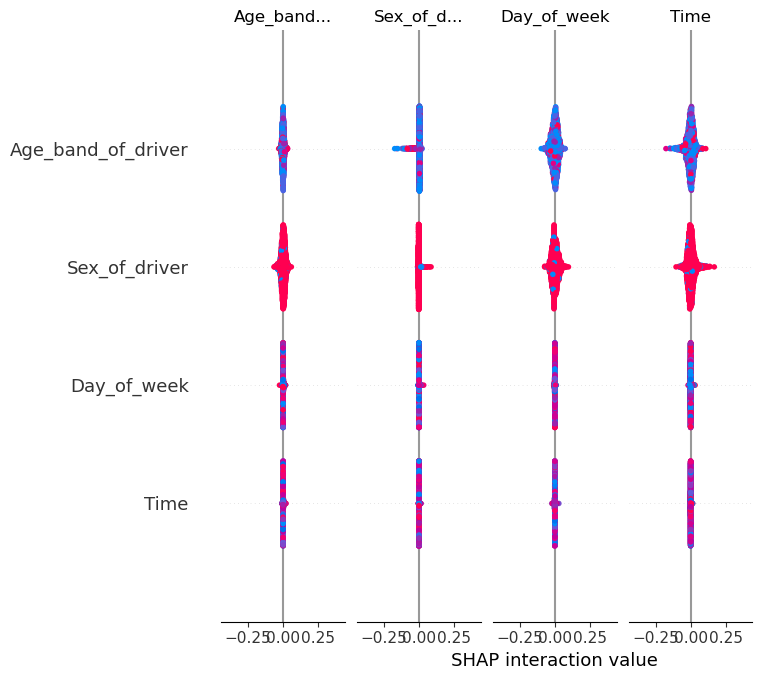

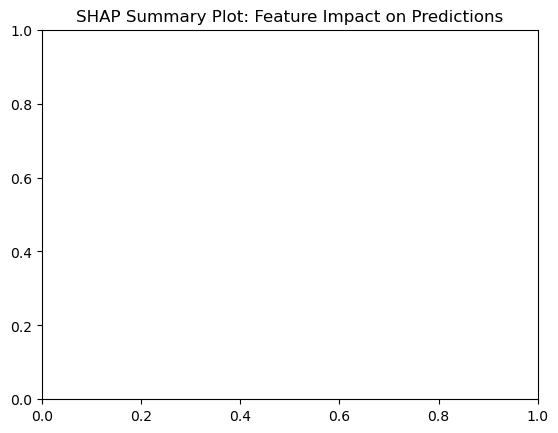

In [18]:
# 1. Global Feature Importance Plot
# Use shap_values[0] for binary models, or shap_values directly if there's only one element
shap_values_to_use = shap_values[0] if isinstance(shap_values, list) else shap_values

# Ensure correct scaled data input for consistency
shap.summary_plot(shap_values_to_use, X_test_scaled, plot_type="bar", feature_names=X.columns)
plt.title("Global Feature Importance")
plt.show()

# 2. SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_values_to_use, X_test_scaled, feature_names=X.columns)
plt.title("SHAP Summary Plot: Feature Impact on Predictions")
plt.show()

Visualisation using confusion metrics and feature importance plots to explain model behaviour

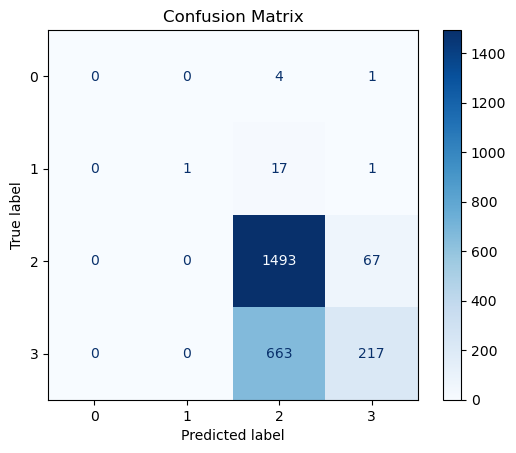

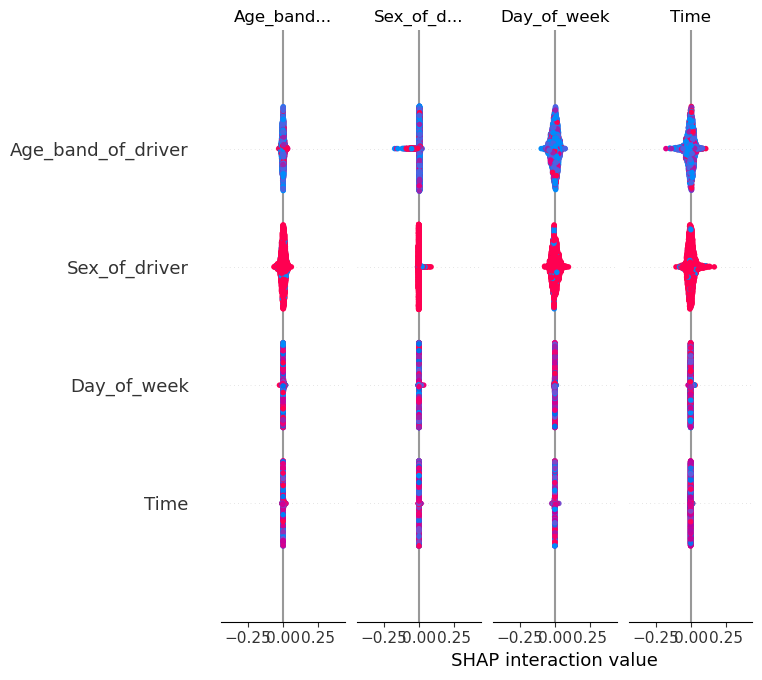

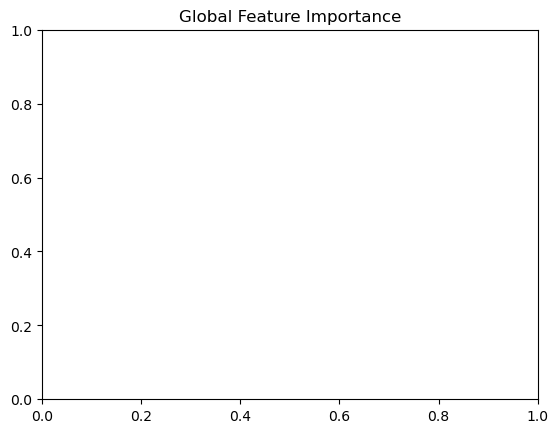

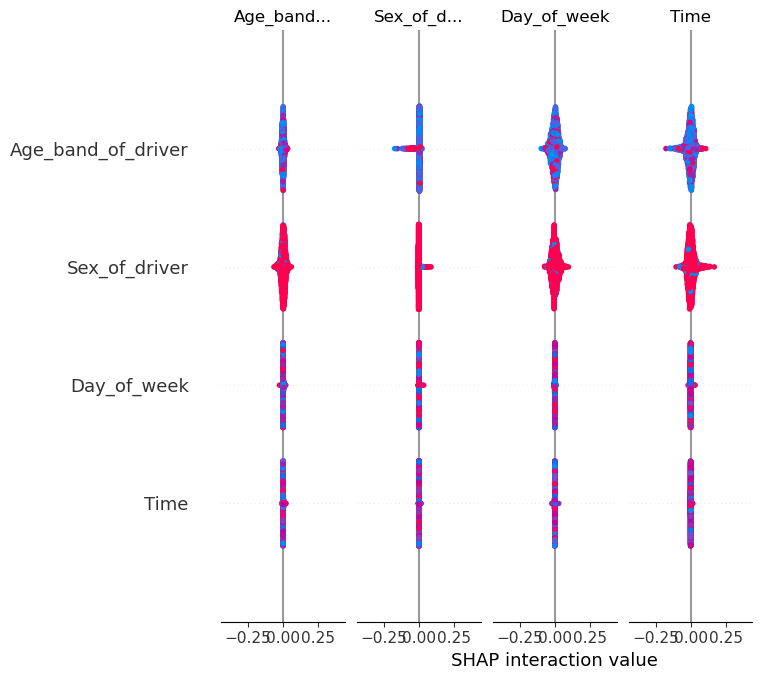

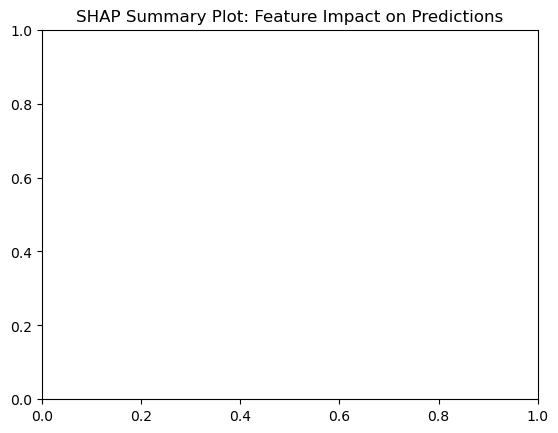

In [19]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv")  

# Separate features and target variable
X = df.drop('Defect_of_vehicle', axis=1)  
y = df['Defect_of_vehicle']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 1. Confusion Matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# 2. Feature Importance Plot (Global)
shap_values_to_use = shap_values[0] if isinstance(shap_values, list) else shap_values
shap.summary_plot(shap_values_to_use, X_test_scaled, plot_type="bar", feature_names=X.columns)
plt.title("Global Feature Importance")
plt.show()

# 3. SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_values_to_use, X_test_scaled, feature_names=X.columns)
plt.title("SHAP Summary Plot: Feature Impact on Predictions")
plt.show()

Visualisation for LIME Vs. SHAP VS PDP plots to explain model behaviour

In [ ]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay

# Load the dataset
df = pd.read_csv("Accident_Dataset_Cleaned.csv")  

# Separate features and target variable
X = df.drop('Day_of_week', axis=1) 
y = df['Day_of_week']

# Split and scale the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

### 1. LIME Explanation for a Single Prediction
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['class_0', 'class_1'], mode='classification')
sample_instance = X_test_scaled[0].reshape(1, -1)
lime_exp = lime_explainer.explain_instance(sample_instance[0], model.predict_proba)
lime_exp.show_in_notebook()

### 2. SHAP Visualizations

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_test_scaled, plot_type="bar", feature_names=X.columns)
plt.title("Global Feature Importance (SHAP)")
plt.show()

# SHAP Force Plot for a Single Instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_scaled[0], feature_names=X.columns)

### 3. PDP Plot for Key Features

# Partial dependence plots for two selected features
features_to_plot = [0, 1]  # Replace with the indices of features you are interested in
PartialDependenceDisplay.from_estimator(model, X_train_scaled, features=features_to_plot, feature_names=X.columns)
plt.suptitle("Partial Dependence Plots")
plt.show()